<a href="https://colab.research.google.com/github/gurnoor6/opponent-modelling/blob/main/Copy_of_LC0_Opponent_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.listdir('/content/drive/MyDrive/rbc')

['trout_logs.tar.gz',
 'validation.zip',
 'train.zip',
 'train',
 '__MACOSX',
 'validation',
 'trained_model.pb.gz',
 'lczero-training',
 'strangefish_train.zip',
 'strangefish_train']

In [3]:
import shutil
import os
import numpy as np
import random

# keep the logs unzipped in a folder in drive itself
# enter path to that folder in log_files_path
# no need to unzip everytime
log_files_path = '/content/drive/MyDrive/rbc'
os.chdir(log_files_path)
train_set = 'strangefish_train'
all_files = os.listdir(train_set)
random.shuffle(all_files)
train_filenames = all_files[:6500]
print(len(train_filenames))

validation_set = 'strangefish_train'
validation_filenames = all_files[6500:]
print(validation_filenames)
print(len(validation_filenames))

6500
['344335.npz', '346072.npz', '334740.npz', '348082.npz', '326446.npz', '322114.npz', '338269.npz', '348153.npz', '318241.npz', '328921.npz', '343065.npz', '345404.npz', '342871.npz', '343038.npz', '341131.npz', '342567.npz', '329291.npz', '344217.npz', '320999.npz', '330693.npz', '334298.npz', '351380.npz', '326980.npz', '326010.npz', '338146.npz', '345427.npz', '321815.npz', '345254.npz', '344193.npz', '322066.npz', '346980.npz', '317993.npz', '346572.npz', '329247.npz', '333139.npz', '347651.npz', '340088.npz', '324952.npz', '325768.npz', '324358.npz', '321445.npz', '331666.npz', '339899.npz', '333765.npz', '327398.npz', '324070.npz', '320176.npz', '320788.npz', '349100.npz', '348332.npz', '329841.npz', '341485.npz', '322708.npz', '339048.npz', '338598.npz', '340656.npz', '321187.npz', '349357.npz', '333180.npz', '335898.npz', '329012.npz', '321850.npz', '317510.npz', '346743.npz', '343473.npz', '332521.npz', '341879.npz', '322846.npz', '325319.npz', '322824.npz', '318222.npz', 

In [4]:
# keep lczero-training unzipped in a folder in drive
# use that instead of unzipping everytime
import shutil, os
os.chdir("/content/drive/MyDrive/rbc/lczero-training/tf")
print(os.listdir())

['weights_run2_790389.pb.gz', 'net.proto', 'update_steps.py', 'model_to_net.py', 'start.sh', 'make_model.py', 'net_to_model.py', 'chunkparsefunc.py', 'lc0_az_policy_map.py', 'decode_training.py', 'chunkparser.py', 'attention_policy_map.py', 'requirements.txt', 'shufflebuffer.py', 'policy_index.py', 'train.py', 'TK-6430 aka 128x10-BPR-64M-6430000.pb.gz', 'model_plot.png', 'loading_lc0.ipynb', 'net.pb.h', 'net.pb.cc', 'net_pb2.py', 'LC0_Opponent_Modelling.ipynb', '.DS_Store', 'details_from_weights_file.py', 'net.py', 'tfprocess.py', 'configs', 'leelalogs', '__pycache__']


In [5]:

weights_file_name = "TK-6430 aka 128x10-BPR-64M-6430000.pb.gz"

In [6]:
import yaml
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()

from tfprocess import TFProcess
if os.path.exists(f"configs/{weights_file_name}.yaml"):
  print(yaml.safe_load(open(f"configs/{weights_file_name}.yaml").read())['model'])
  tfprocess = TFProcess(yaml.safe_load(open(f"configs/{weights_file_name}.yaml").read()))
else:
  print(yaml.safe_load(open(f"configs/example.yaml").read()))
  tfprocess = TFProcess(yaml.safe_load(open(f"configs/example.yaml").read())['model'])
tfprocess.init_net()
tfprocess.replace_weights(f"{weights_file_name}", ignore_errors = False)

{'filters': 128, 'residual_blocks': 10, 'se_ratio': 4, 'policy': 'convolution', 'pol_embedding_size': 64, 'pol_encoder_layers': 0, 'pol_encoder_heads': 0, 'pol_encoder_d_model': 32, 'pol_encoder_dff': 128, 'policy_d_model': 64, 'value': 'wdl', 'moves_left': 'none'}
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 t

In [7]:
print(tfprocess.model.input)
print(tfprocess.model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 112, 8, 8), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1858), dtype=tf.float32, name=None), name='apply_policy_map/MatMul:0', description="created by layer 'apply_policy_map'")


In [8]:
import numpy as np

class My_Custom_Generator(tf.keras.utils.Sequence) :
  
  def __init__(self, filenames, batch_size, randomize, folder_name) :
    self.filenames = filenames
    self.batch_size = batch_size
    self.randomize = randomize
    self.folder_name = folder_name
    self.boards_per_game = 4
    
    
  def __len__(self) :
    return (np.ceil(len(self.filenames) / float(self.batch_size))).astype(int)
  
  
  def __getitem__(self, idx) :
    filenames = self.filenames[idx * self.batch_size : (idx+1) * self.batch_size]

    inputs = []
    outputs = []
    legal_moves = []
    for f in filenames:
      if not f.endswith('.npz'): continue
      loaded = np.load(os.path.join(self.folder_name, f))
      if 'inputs.npy' in loaded._files and 'outputs.npy' in loaded._files and 'legal_moves.npy' in loaded._files:
        length = len(loaded['inputs'])
        index = np.random.choice(length, length,replace=False)
        if self.randomize:
          index = np.random.choice(length, min(self.boards_per_game, length), replace = False)
        inputs.extend(loaded['inputs'][index])
        outputs.extend(loaded['outputs'][index])
        legal_moves.extend(loaded['legal_moves'][index])
    
    # Y_new = []
    # for item in outputs: Y_new.append(item.flatten())
    
    # print(np.array(inputs).shape, np.array(Y_new).shape)
    return (np.array(inputs), np.array(legal_moves)), np.array(outputs)

In [9]:
batch_size = 64

training_generator = My_Custom_Generator(train_filenames, batch_size, True, train_set)
validation_generator = My_Custom_Generator(validation_filenames, batch_size, False, validation_set)

In [10]:
from keras.utils.vis_utils import plot_model



input_1 = tfprocess.model.input
input_2 = tf.keras.Input(shape = (1858))

# Remove illegal first then softmax over remaining
outputs = tfprocess.model.output
output_1 = outputs
output_2 = tf.keras.layers.Softmax()(output_1)
illegal_filler = tf.zeros_like(output_2) - 1e-10
output_3 = tf.where(tf.cast(input_2, bool), output_2, illegal_filler)
output_4 = tf.keras.layers.Lambda(lambda x: tf.math.divide(x, tf.math.reduce_sum(x)))(output_3)


# illegal_filler = tf.zeros_like(output_2) - 20
# output_2 = tf.where(tf.cast(input_2, bool), output_1, illegal_filler)
# output_3 = tf.keras.layers.Softmax()(output_2)
# output_3 = tf.keras.layers.Multiply()([input_2, output_2])
# output_3 = tf.where(tf.cast(input_2, bool), output_2, tf.expand_dims(tf.constant(1e-9 * np.ones(1858, dtype = 'float32')), 0))

# output = tf.keras.layers.Lambda(lambda x: tf.math.divide(x, tf.linalg.norm(x, ord=1)))(output_3)
# output = tf.keras.layers.Lambda(lambda x: tf.math.divide(x, tf.math.reduce_sum(x)))(output_3)

model = tf.keras.Model(inputs = [input_1, input_2], outputs = output_4)
# model = tf.keras.Model(inputs = input_1, outputs = output_1)
# model.summary()
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
import tensorflow as tf
import tensorflow_datasets as tfds
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_name = tf.test.gpu_device_name()
print("Device Name =", device_name)
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Num GPUs Available:  1
Device Name = /device:GPU:0
Found GPU at: /device:GPU:0


In [12]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [13]:
os.chdir("/content/drive/MyDrive/rbc") # nullify effect of previous chdir

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

In [15]:
is_value_head = False

In [16]:
model.evaluate(validation_generator, steps = int(len(validation_filenames) // batch_size))

9/9 [==============================] - 21s 2s/step - loss: 9.1367 - categorical_accuracy: 0.1950


[9.136724472045898, 0.1949794441461563]

In [17]:
if is_value_head:
  history = model.fit(
    inputs,
    [
      outputs,
      value_outputs
    ],
    epochs = 10,
  )
else:
  # history = model.fit(
  #   [
  #    inputs,
  #    legal_moves
  #   ],
  #   outputs,
  #   validation_data = ((validation_inputs, validation_legal_moves), validation_outputs,),
  #   epochs = 20,
  # )
  history = model.fit_generator(
      generator=training_generator,
      steps_per_epoch = int(len(train_filenames) // batch_size),
      epochs = 20,
      verbose = 1,
      validation_data = validation_generator,
      validation_steps = int(len(validation_filenames) // batch_size)  # Use only 1000 samples for validation
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
101/101 [==============================] - 117s 1s/step - loss: 2.5432 - categorical_accuracy: 0.3642 - val_loss: 4.4723 - val_categorical_accuracy: 0.2283
Epoch 2/20
101/101 [==============================] - 102s 1s/step - loss: 2.1392 - categorical_accuracy: 0.4669 - val_loss: 4.3215 - val_categorical_accuracy: 0.2782
Epoch 3/20
101/101 [==============================] - 112s 1s/step - loss: 2.0510 - categorical_accuracy: 0.4919 - val_loss: 4.1919 - val_categorical_accuracy: 0.3187
Epoch 4/20
101/101 [==============================] - 104s 1s/step - loss: 1.9628 - categorical_accuracy: 0.5090 - val_loss: 3.8408 - val_categorical_accuracy: 0.3304
Epoch 5/20
101/101 [==============================] - 104s 1s/step - loss: 1.9304 - categorical_accuracy: 0.5193 - val_loss: 4.1287 - val_categorical_accuracy: 0.3501
Epoch 6/20
101/101 [==============================] - 104s 1s/step - loss: 1.8914 - categorical_accuracy: 0.5299 - val_loss: 3.5305 - val_categorical_accuracy: 0.358

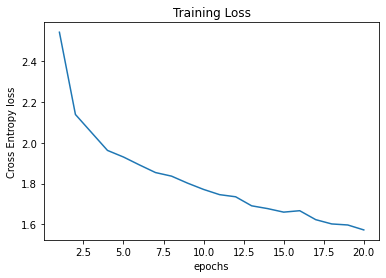

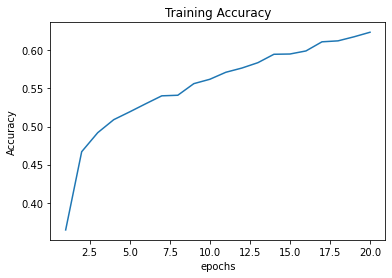

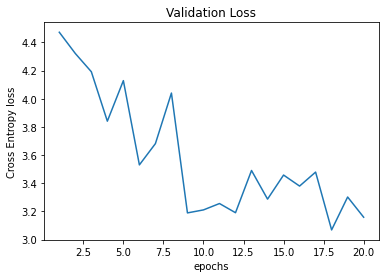

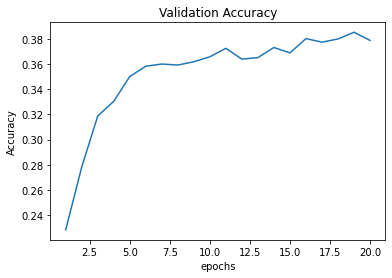

In [18]:
# Plot the loss a sa function of number of epochs
import matplotlib.pyplot as plt

# plt.subplot(2, 2, 1)
plt.figure()
plt.title('Training Loss')
plt.xlabel('epochs')
plt.ylabel('Cross Entropy loss')
plt.plot(list(map(lambda x: x+1, range(len(history.history['loss'])))),  history.history['loss'])

# plt.subplot(2, 2, 2)
plt.figure()
plt.title('Training Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(list(map(lambda x: x+1, range(len(history.history['categorical_accuracy'])))),  history.history['categorical_accuracy'])

# plt.subplot(2, 2, 3)
plt.figure()
# Plot the loss a sa function of number of epochs
plt.title('Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Cross Entropy loss')
plt.plot(list(map(lambda x: x+1, range(len(history.history['val_loss'])))),  history.history['val_loss'])

# plt.subplot(2, 2, 4)
plt.figure()
plt.title('Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(list(map(lambda x: x+1, range(len(history.history['val_categorical_accuracy'])))),  history.history['val_categorical_accuracy'])

In [19]:
# Saving Model in lc0 format
from google.colab import files
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.summary() # Check that input2, softmax and where layer are removed only. 
tfprocess.model = model
tfprocess.save_leelaz_weights('trained_model.pb.gz')
files.download('trained_model.pb.gz')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 8, 8)]  0           []                               
                                                                                                  
 input/conv2d (Conv2D)          (None, 128, 8, 8)    129024      ['input_1[0][0]']                
                                                                                                  
 input/bn (BatchNormalization)  (None, 128, 8, 8)    512         ['input/conv2d[0][0]']           
                                                                                                  
 activation (Activation)        (None, 128, 8, 8)    0           ['input/bn[0][0]']               
                                                                                            

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# from google.colab import files

# folder_name = "saved-model"

# if os.path.exists(folder_name):
#   shutil.rmtree(folder_name)
# os.mkdir(folder_name)

# if os.path.exists(folder_name + ".zip"):
#   os.remove(folder_name + ".zip")
# model.save(folder_name)

# shutil.make_archive(folder_name, 'zip', folder_name)
# files.download(folder_name + ".zip") 

# if os.path.exists(folder_name):
#   shutil.rmtree(folder_name)
# os.mkdir(folder_name)


# if os.path.exists(folder_name + ".pb.gz"):
#   os.remove(folder_name + ".pb.gz")
# tfprocess.model = model
# tfprocess.save_leelaz_weights(folder_name)
# files.download(folder_name + ".pb.gz")